In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
area = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
price = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
m = len(area)

Epoch: 0, cost = 0.48129525780677795, theta0 = 0.07098705321550369, theta1 = 0.48356035351753235
Epoch: 10, cost = 0.10892622917890549, theta0 = 0.07982368022203445, theta1 = 0.3530527353286743
Epoch: 20, cost = 0.10667474567890167, theta0 = 0.10557971149682999, theta1 = 0.34941565990448
Epoch: 30, cost = 0.10458169877529144, theta0 = 0.13041360676288605, theta1 = 0.3459128141403198
Epoch: 40, cost = 0.1026359274983406, theta0 = 0.15435786545276642, theta1 = 0.3425354063510895
Epoch: 50, cost = 0.10082705318927765, theta0 = 0.17744435369968414, theta1 = 0.3392789661884308
Epoch: 60, cost = 0.09914547204971313, theta0 = 0.19970378279685974, theta1 = 0.3361392319202423
Epoch: 70, cost = 0.09758220613002777, theta0 = 0.22116579115390778, theta1 = 0.333111971616745
Epoch: 80, cost = 0.09612894803285599, theta0 = 0.24185895919799805, theta1 = 0.3301931321620941
Epoch: 90, cost = 0.09477793425321579, theta0 = 0.2618108093738556, theta1 = 0.32737889885902405
Epoch: 100, cost = 0.0935219973325

Epoch: 870, cost = 0.07698909938335419, theta0 = 0.7676005959510803, theta1 = 0.25603586435317993
Epoch: 880, cost = 0.07698486000299454, theta0 = 0.7687183022499084, theta1 = 0.255878210067749
Epoch: 890, cost = 0.07698092609643936, theta0 = 0.7697960734367371, theta1 = 0.2557261884212494
Epoch: 900, cost = 0.07697724550962448, theta0 = 0.7708351612091064, theta1 = 0.2555796205997467
Epoch: 910, cost = 0.07697385549545288, theta0 = 0.771837055683136, theta1 = 0.25543829798698425
Epoch: 920, cost = 0.076970674097538, theta0 = 0.7728029489517212, theta1 = 0.2553020715713501
Epoch: 930, cost = 0.0769677460193634, theta0 = 0.7737343311309814, theta1 = 0.25517070293426514
Epoch: 940, cost = 0.07696500420570374, theta0 = 0.7746322751045227, theta1 = 0.25504401326179504
Epoch: 950, cost = 0.07696245610713959, theta0 = 0.77549809217453, theta1 = 0.25492191314697266
Epoch: 960, cost = 0.07696008682250977, theta0 = 0.7763329148292542, theta1 = 0.25480416417121887
Epoch: 970, cost = 0.0769578963

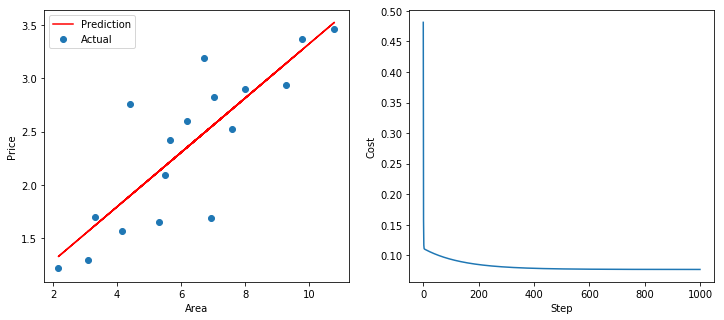

In [29]:
X = tf.placeholder(name='X', dtype='float32')
Y = tf.placeholder(name='Y', dtype='float32')

theta0 = tf.Variable(0.0, name='theta0')
theta1 = tf.Variable(0.0, name='theta1')

y_pred = theta0 + theta1*X

cost_function = (1.0/ (2.0*m)) * tf.reduce_sum(tf.pow((y_pred - Y), 2))
##cost_summmary = tf.summary.histogram(name='cost_summary', values=cost_function)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.03).minimize(cost_function)

all_cost = []
with tf.Session() as sess:
    ##cost_writer = tf.summary.FileWriter(logdir='./graphs/cost_function_summary', graph=sess.graph)
    sess.run(tf.global_variables_initializer())
    for step in range(1000):
        sess.run(optimizer, {X: area, Y: price})
        
        ##sess.run(cost_function, {X: area, Y: price})
        ##summary = sess.run(cost_summmary)
        ##cost_writer.add_summary(summary, step)
        
        cost = sess.run(cost_function, {X: area, Y: price})
        all_cost.append(cost)
        if(step % 10 == 0):
            print("Epoch: {0}, cost = {1}, theta0 = {2}, theta1 = {3}".format(step, cost, sess.run(theta0), sess.run(theta1)))
    
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.scatter(area, price, label="Actual")
    plt.plot(area, sess.run(y_pred,{X: area, Y: price}), c='r', label='Prediction')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(range(1000), all_cost)
    plt.xlabel('Step')
    plt.ylabel('Cost')
    plt.show()
cost_writer.close()        